# PHILADELPHIA COLLISION DATASET (Coursera Capstone Project)

## Introduction

Vehicular accidents are a leading cause of injuries in the US. In 2018 motor-vehicle crashes accoundted for 39,404 deaths, 4.5 million medically consulted injuries and resulted in injury costs of $445.6 billion dollars. [NTSC Injury Facts](https://injuryfacts.nsc.org/motor-vehicle/overview/introduction/)

According to the ["Vision Zero"](https://www.nsc.org/Portals/0/Documents/DistractedDrivingDocuments/Driver-Tech/Road%20to%20Zero/The-Report.pdf?ver=2018-04-17-111652-263) Plan put together by the NSC, and important  aspect of reducing the severity of accidents is to design roadways in a way to prevent them.

An important aspect of the procedure to reduce the number of accidents is to identify not only the probelmatic areas, but also the additional factors that drive the severity of those accidents.

Identifying those problem areas and factors is an invaluable tool for both city planners and government officials. It also can prove to be a tool for insurance groups to push local governments into action. Nieghborhood groups can substanciate their claims for improvement in their local area. Finally Police and Emergency Response departments can better plan and hopefully reduce the amount of man hours and divert more resources to other causes when collisions are reduced.

## Business Problem
The city of Philadelphia has been implementing the __Vision Zero__ plant discussed above to improve upon the safety of its inhabitants. [They are using data to make smart decisions for city planning and enformcement.](http://visionzerophl.com/uploads/attachments/ck181ipfv1isp9pd66ww0iw0f-file-print-pages-hq-visionzero-y2-update.pdf) 

So the problem to be addressed in this report is can we identify the severity of collisions based on design and situational parameters to help the city of Philadelphia better design roads and traffic to reduce the severity of the vehicular collisions.

## Data Understanding

The dataset for this analysis is a the dataset used for Philadelphia's Vision Zero project. The data is derived form PennDOT's Crash Incident Dataset filtered to 2013-2017. PennDOT's full dataset can be accessed at their [API](https://data.pa.gov/resource/dc5b-gebx.json?), it does not contain data past 2017. The actual dataset for the city of Philadelphia can be found at the [OpenDataPhilly portal](https://www.opendataphilly.org/dataset/vehicular-crash-data). This project uses both the geojson and csv versions of the data.

Additionally for visualization and some spatial investigation this project makes use of the [zipcodes boundaries](https://www.opendataphilly.org/dataset/zip-codes) obtained at OpenDataPhilly. We will aslo be using the metadata form the same website to idenfity some of the more useful features.

In [77]:
import pandas as pd
import seaborn as sns
import contextily as ctx
import geopandas
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
collisions=pd.read_csv('Data/crash_data_collision_crash_2013_2017_vz.csv')
col_geo=po_districts=geopandas.read_file("Data/crash_data_collision_crash_2013_2017_vz.geojson")

In [3]:
collisions.head(5)

,objectid,crn,district,county,crash_year,crash_month,day_of_week,time_of_day,hour_of_day,illumination,...,illumination_dark,running_stop_sign,train,trolley,hit_parked_vehicle,mc_drinking_driver,drug_related,illegal_drug_related,drugged_driver,impaired_driver
0,8322,2014125105,6,67,2014,12,2,600,6,3,...,1,0,0,0,0,0,0,0,0,0
1,8238,2014130456,6,67,2014,12,6,41,0,3,...,1,0,0,0,0,0,0,0,0,0
2,8728,2014130560,6,67,2014,12,6,1330,13,1,...,0,0,0,0,0,0,0,0,0,0
3,1,2017028806,6,67,2017,2,5,921,9,1,...,0,0,0,0,0,0,0,0,0,0
4,2,2017041347,6,67,2017,3,5,2210,22,3,...,1,0,0,0,0,0,0,0,0,0


In [4]:
col_geo.head(5)

,objectid,crn,district,county,crash_year,crash_month,day_of_week,time_of_day,hour_of_day,illumination,...,running_stop_sign,train,trolley,hit_parked_vehicle,mc_drinking_driver,drug_related,illegal_drug_related,drugged_driver,impaired_driver,geometry
0,8322,2014125105,6,67,2014,12,2,600,6,3,...,0,0,0,0,0,0,0,0,0,POINT (-75.12215 40.05319)
1,8238,2014130456,6,67,2014,12,6,41,0,3,...,0,0,0,0,0,0,0,0,0,POINT (-75.03507 40.07460)
2,8728,2014130560,6,67,2014,12,6,1330,13,1,...,0,0,0,0,0,0,0,0,0,POINT (-75.18808 39.97514)
3,1,2017028806,6,67,2017,2,5,921,9,1,...,0,0,0,0,0,0,0,0,0,POINT (-75.04050 40.03680)
4,2,2017041347,6,67,2017,3,5,2210,22,3,...,0,0,0,0,0,0,0,0,0,POINT (-75.13290 39.99110)


To better correlate and have descriptions of features we import the metadata

In [ ]:
metafields=pd.read_csv('Data/fields.csv')
metafields['Field Name']=metafields['Field Name'].str.lower()
display(metafields.head(5))

In [6]:
zipcode_boundaries=geopandas.read_file("Data/Zipcodes_Poly.geojson")

The metadata for the collisions dataset can be found [here](https://metadata.phila.gov/#home/datasetdetails/5543865420583086178c4eba/representationdetails/5c4114cde23cad276ca4245c/?view_287_page=5)

In [7]:
len(collisions.columns)

96

The collision data set contains 96 columns.

In [8]:
collisions.columns

Index(['objectid', 'crn', 'district', 'county', 'crash_year', 'crash_month',
       'day_of_week', 'time_of_day', 'hour_of_day', 'illumination', 'weather',
       'road_condition', 'collision_type', 'intersect_type', 'tcd_type',
       'location_type', 'fatal_count', 'injury_count', 'person_count',
       'latitude', 'longitude', 'bicycle_count', 'maj_inj_count',
       'mod_inj_count', 'min_inj_count', 'tot_inj_count', 'ped_count',
       'ped_death_count', 'ped_maj_inj_count', 'max_severity_level',
       'injury_or_fatal', 'fatal_or_maj_inj', 'injury', 'fatal', 'sch_bus_ind',
       'automobile_count', 'motorcycle_count', 'bus_count',
       'small_truck_count', 'heavy_truck_count', 'suv_count', 'van_count',
       'comm_veh_count', 'rdwy_surf_type_cd', 'intersection', 'state_road',
       'signalized_int', 'stop_controlled_int', 'hit_deer', 'hit_tree_shrub',
       'hit_embankment', 'hit_pole', 'hit_gdrail', 'hit_gdrail_end',
       'hit_barrier', 'hit_bridge', 'overturned', 'alcoh

The target value that our program will attempt to predict is the severity of the collision. This is denoted by MAX_SEVERITY_LEVEL in the dataset 

|MAX_SEVERITY_LEVEL |Maximum injury severity level of the crash |
| - | - |
|0 | Not injured
|1 | Killed
|2 | Major injury
|3 | Moderate injury
|4 | Minor injury
|8 | Injury/ Unknown Severity
|9 | Unknown

In order to determine what features/ columns to a count of the unique values per feature is performed. Features with low counts are also presented. From this approach it is clear which columns can be safetly left out of the investigation (for example `county` and `district`).

In [9]:
col_values=[]
for col in collisions.columns:
    num_values=len(collisions[col].unique())
    col_values.append([col,num_values])
col_df=pd.DataFrame(col_values,columns=['column','values'])
col_df.head()
for i in range(1,5):
    print('Number of distinct values: '+str(i))
    display(col_df[col_df.values==i].sort_values('column'))

Number of distinct values: 1


,column,values
3,county,1
2,district,1
67,limit_65mph,1


Number of distinct values: 2


,column,values
70,aggressive_driving,2
57,alcohol_related,2
61,cell_phone,2
82,comm_vehicle,2
64,cross_median,2
66,curve_dvr_error,2
65,curved_road,2
85,deer_related,2
60,distracted,2
58,drinking_driver,2


Number of distinct values: 3


,column,values
21,bicycle_count,3
37,bus_count,3
39,heavy_truck_count,3


Number of distinct values: 4


,column,values
42,comm_veh_count,4
36,motorcycle_count,4
27,ped_death_count,4
28,ped_maj_inj_count,4
43,rdwy_surf_type_cd,4
34,sch_bus_ind,4
38,small_truck_count,4
41,van_count,4


From the previous counts we can also determine that quite a lot of columns are descriptive of the incident outcome and not the conditions (which are more interesting for planning). These can be identified by the prefixes, for example `hit` and `count`.

In [18]:
col_df.sort_values('values',ascending=False).head(5)

,column,values
0,objectid,46863
1,crn,46863
20,longitude,7370
19,latitude,7352
7,time_of_day,1441


As far as the values from the largest counts `objectid` and `crn` seem to be identifiers and as such only require one of them.



Since the dataset contains columns not explained in the metadata we want to identify why the diference.

In [35]:
undescribed_cols_CSV = np.setdiff1d(collisions.columns,metafields['Field Name'])
undescribed_cols_CSV

array(['aggressive_driving', 'alcohol_related', 'cell_phone',
       'collision_type', 'comm_vehicle', 'county', 'cross_median',
       'curve_dvr_error', 'curved_road', 'deer_related', 'distracted',
       'district', 'drinking_driver', 'driver_count_16yr',
       'driver_count_17yr', 'driver_count_18yr', 'driver_count_19yr',
       'driver_count_20yr', 'driver_count_50_64yr',
       'driver_count_65_74yr', 'driver_count_75plus', 'drug_related',
       'drugged_driver', 'fatal', 'fatal_or_maj_inj', 'fatigue_asleep',
       'hit_barrier', 'hit_bridge', 'hit_deer', 'hit_embankment',
       'hit_gdrail', 'hit_gdrail_end', 'hit_parked_vehicle', 'hit_pole',
       'hit_tree_shrub', 'illegal_drug_related', 'illumination_dark',
       'impaired_driver', 'injury', 'injury_or_fatal', 'latitude',
       'limit_65mph', 'location_type', 'longitude', 'mc_drinking_driver',
       'nhtsa_agg_driving', 'objectid', 'overturned', 'pedestrian',
       'psp_reported', 'rdwy_surf_type_cd', 'running_red_lt

The fields identified as descriptive of the accident outcome seem to the majority of the extra fields not contained in the metadata

In [36]:
undescribed_cols_META = np.setdiff1d(metafields['Field Name'],collisions.columns)
undescribed_cols_META

array(['belted_death_count', 'belted_maj_inj_count',
       'bicycle_death_count', 'bicycle_maj_inj_count',
       'mcycle_death_count', 'mcycle_maj_inj_count', 'sch_zone_ind',
       'unb_death_count', 'unb_maj_inj_count', 'unk_inj_deg_count',
       'unk_inj_per_count', 'vehicle_count'], dtype=object)

We create a dataframe of only existing fields

In [112]:
efields=metafields[~metafields['Field Name'].isin(undescribed_cols_META)]
efields

,Field Name,Alias,Description,Type
0,automobile_count,dataset,Total Amount of Automobiles Involved in crash,Numeric
3,bicycle_count,dataset,Total number of bicycles involved,Numeric
6,bus_count,dataset,Total number of buses involved,Numeric
7,comm_veh_count,dataset,Total number of commercial vehicles involved i...,Numeric
8,crash_month,dataset,Month when the crash occurred,Text
9,crash_year,dataset,Year in which the crash occurred.,Text
10,crn,dataset,Crash record number - unique identifier for ea...,Numeric
11,day_of_week,dataset,Day of the Week code when crash occurred-<br /...,Text
12,fatal_count,dataset,Total number of fatalities involved,Numeric
13,heavy_truck_count,dataset,Total number of heavy trucks involved in crash,Numeric


Quick correlation matrix

In [116]:
corr = collisions[efields['Field Name']].corr()
corr.style.background_gradient(cmap='coolwarm')

,automobile_count,bicycle_count,bus_count,comm_veh_count,crash_month,crash_year,crn,day_of_week,fatal_count,heavy_truck_count,hour_of_day,illumination,injury_count,intersect_type,intersection,maj_inj_count,max_severity_level,min_inj_count,mod_inj_count,motorcycle_count,ped_count,ped_death_count,ped_maj_inj_count,person_count,road_condition,small_truck_count,suv_count,tcd_type,time_of_day,unbelted_occ_count,van_count
automobile_count,1.000000,-0.143088,-0.096694,-0.136759,-0.013179,0.049462,0.049311,0.000909,-0.036213,-0.097145,-0.001427,0.017199,0.048541,0.025390,0.042169,-0.026290,-0.045017,0.046656,-0.024983,-0.114706,-0.265840,-0.032719,-0.049158,0.156169,-0.016640,-0.168534,-0.314758,0.071835,-0.001321,0.031306,-0.182177
bicycle_count,-0.143088,1.000000,-0.016798,-0.028494,0.037701,-0.022885,-0.026510,0.003053,-0.006974,-0.021205,0.014885,-0.038335,-0.014753,0.017145,0.031110,0.002992,0.051063,0.002945,0.017724,-0.026544,-0.104043,-0.013370,-0.020418,-0.061490,-0.038980,-0.028766,-0.073796,0.019923,0.014679,0.006772,-0.035165
bus_count,-0.096694,-0.016798,1.000000,0.675674,0.006028,0.005269,0.004918,0.002397,0.019168,-0.003740,-0.005956,-0.046360,0.108940,-0.000825,0.005656,-0.003724,0.023821,0.074081,-0.001102,-0.017601,-0.016628,0.015634,-0.001551,0.231196,-0.002717,-0.018996,-0.056144,0.005300,-0.005886,-0.000470,-0.021309
comm_veh_count,-0.136759,-0.028494,0.675674,1.000000,0.003237,0.009488,0.009051,0.001868,0.019909,0.662993,-0.011649,-0.064494,0.060374,-0.010825,-0.012012,0.003025,-0.001143,0.038883,-0.006686,-0.024056,-0.044058,0.009060,-0.002698,0.154855,-0.001601,-0.024625,-0.071918,-0.012071,-0.011559,0.005787,-0.031216
crash_month,-0.013179,0.037701,0.006028,0.003237,1.000000,-0.008943,0.084221,0.005646,0.010069,0.003856,-0.005433,0.034092,-0.006072,0.004255,0.014296,-0.002441,0.003820,-0.002298,-0.005006,0.009317,0.004799,0.009934,0.000199,-0.006348,-0.088207,-0.017775,0.008649,0.008281,-0.005480,0.030693,-0.000172
crash_year,0.049462,-0.022885,0.005269,0.009488,-0.008943,1.000000,0.983878,-0.013382,0.000149,0.017088,-0.064339,0.009637,-0.003537,0.002354,-0.331179,0.003522,0.007381,-0.012319,0.016863,0.000686,-0.013435,0.001910,0.005676,-0.005750,-0.021634,-0.047566,0.137815,0.005629,-0.064318,0.195392,0.035756
crn,0.049311,-0.026510,0.004918,0.009051,0.084221,0.983878,1.000000,-0.011720,0.001548,0.016862,-0.064516,0.021353,-0.005230,0.003321,-0.327962,0.005167,0.008884,-0.016503,0.018347,-0.003458,-0.013130,0.003491,0.005941,-0.007672,-0.012993,-0.047326,0.136039,0.006386,-0.064498,0.191899,0.033278
day_of_week,0.000909,0.003053,0.002397,0.001868,0.005646,-0.013382,-0.011720,1.000000,-0.005084,-0.000895,0.014850,0.007923,-0.002413,0.004034,0.006109,-0.005805,-0.002237,0.005433,-0.000162,-0.004416,0.005420,0.004023,-0.000060,0.006279,-0.009606,0.007821,0.001172,0.001875,0.014730,-0.007035,-0.006218
fatal_count,-0.036213,-0.006974,0.019168,0.019909,0.010069,0.000149,0.001548,-0.005084,1.000000,-0.000479,-0.014120,0.032116,-0.029580,-0.015408,-0.018906,0.039011,-0.097845,-0.034042,-0.004186,0.071787,0.074918,0.649488,-0.000513,0.017411,-0.009289,-0.009684,-0.013794,-0.027567,-0.014044,-0.003044,-0.001679
heavy_truck_count,-0.097145,-0.021205,-0.003740,0.662993,0.003856,0.017088,0.016862,-0.000895,-0.000479,1.000000,-0.005258,-0.047886,-0.016680,-0.008477,-0.015293,0.003963,-0.021303,-0.013988,-0.007473,-0.016565,-0.042129,-0.002168,-0.003695,0.009146,-0.000299,-0.025206,-0.045972,-0.013025,-0.005212,0.009607,-0.025228


From this investigation the initial feature selection to determine was selected to be as follows, including the target value `max_severity_level`.

In [42]:
features=['crash_month',
 'crash_year',
 'crn',
 'day_of_week',
 'hour_of_day',
 'illumination',
 'intersect_type',
 'intersection',
 'max_severity_level',
 'tcd_type',
 'road_condition']

In [44]:
collision_data=collisions[features]
collision_data.head(5)

,crash_month,crash_year,crn,day_of_week,hour_of_day,illumination,intersect_type,intersection,max_severity_level,tcd_type,time_of_day,road_condition
0,12,2014,2014125105,2,6,3,5,1,4,2,600,0
1,12,2014,2014130456,6,0,3,1,1,0,2,41,0
2,12,2014,2014130560,6,13,1,1,1,8,2,1330,0
3,2,2017,2017028806,5,9,1,5,0,4,2,921,1
4,3,2017,2017041347,5,22,3,1,0,4,2,2210,1


Since we will be using supervised learning in our initial approach we want to observe our target variable `max_severity_level` and its counts.

In [60]:
collisions.max_severity_level.value_counts().to_frame()

,max_severity_level
4,18011
8,11637
0,9243
3,5001
9,1537
2,1042
1,392


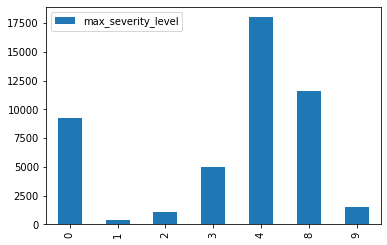

In [63]:
collisions.max_severity_level.value_counts().to_frame().sort_index().plot(kind='bar')

As expected we have an inbalanced dataset (which is expected since we would expect fatalities to be in the minority of outcomes). We will need to oversample or perform synthetic minority oversampling to help improve the accuracy 

We also decide to remove target values for which the `max_severity_level` is either 8 or 9 as these are used for incomplete data. (either unknown severity, or unknown injury)

In [66]:
collision_data=collision_data[~collision_data.max_severity_level.isin([8,9])]

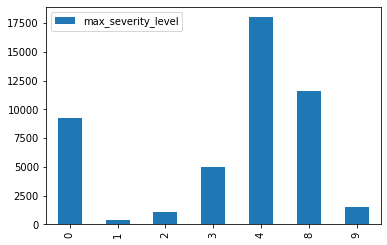

In [67]:
collisions.max_severity_level.value_counts().to_frame().sort_index().plot(kind='bar')

Since we want to also determine if there is any particular spatial relationships to the collision outcomes we perform the same process on the geojson data but keep the geometry parameter

In [75]:
data_geo=col_geo[features+['geometry']]
data_geo=data_geo[~data_geo.max_severity_level.isin([8,9])]

In [102]:
features

['crash_month',
 'crash_year',
 'crn',
 'day_of_week',
 'hour_of_day',
 'illumination',
 'intersect_type',
 'intersection',
 'max_severity_level',
 'tcd_type',
 'time_of_day',
 'road_condition']

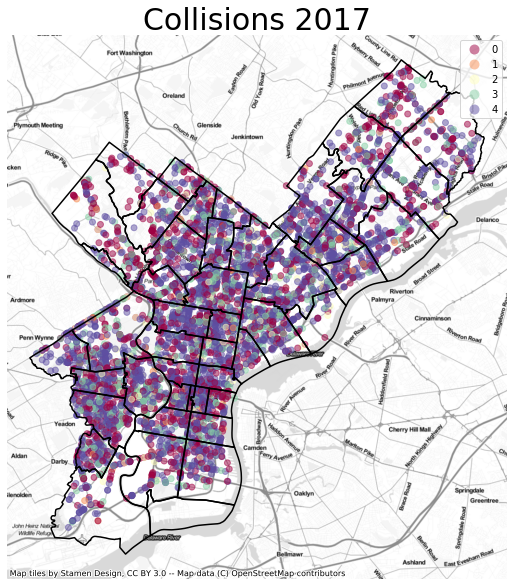

In [108]:
fig, ax = plt.subplots(1, 1,figsize=(10,10))
data_geo[data_geo.crash_year==2017] \
.to_crs(epsg=3857) \
.plot(ax=ax,column='max_severity_level',categorical=True, cmap='Spectral', alpha=0.5, legend=True)

zipcode_boundaries.to_crs(epsg=3857).boundary.plot(ax=ax, color='k')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()
ax.set_title('Collisions 2017',fontsize='30');

From the illustration above, it appears that location might have some influence over the outcome of the result. To better model this, we include the zipcode into the dataset.

In [109]:
data_geo=geopandas.sjoin(data_geo, zipcode_boundaries[['CODE','geometry']], how='inner',op='within')

In [110]:
data_geo.head(5)

,crash_month,crash_year,crn,day_of_week,hour_of_day,illumination,intersect_type,intersection,max_severity_level,tcd_type,time_of_day,road_condition,geometry,index_right,CODE
1,12,2014,2014130456,6,0,3,1,1,0,2,41,0,POINT (-75.03507 40.07460),25,19152
178,5,2017,2017060507,1,1,3,0,0,0,0,155,0,POINT (-75.05550 40.06150),25,19152
299,4,2017,2017043828,2,19,1,2,0,4,0,1917,0,POINT (-75.05220 40.04460),25,19152
386,3,2017,2017035663,3,12,1,0,0,0,0,1241,4,POINT (-75.05100 40.04800),25,19152
478,1,2017,2017013193,6,17,3,1,0,4,2,1750,0,POINT (-75.06080 40.05670),25,19152


In [ ]:
data_geo.groupby()